In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

In [2]:
df = pd.read_csv('datasets/bfar.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Columns: 215 entries, RESPONSE to CV: PS_WT
dtypes: float64(75), int64(139), object(1)
memory usage: 2.2+ MB


In [3]:
df.head()

,RESPONSE,A1:AREA,A2:GROUP,B3:AGE,B5:SEX,B6:M-STATUS,B7:EDUCATION,B8:HH_SIZE,C1:TOT_INCOME/A,C2:INCOME/B/FISH,...,J6:AVE_FBP-PERC,J7.1,J7.2,J7.3,J7.4,J7.5,J7:AVE_FBP-CONT,K:COMMENTS,CD: P_SCORE,CV: PS_WT
0,1,ABULUG,1,33,1,2,3,2,1,1,...,4.67,3.0,3.0,5.0,5.0,5.0,4.2,NaN,NaN,NaN
1,2,ABULUG,1,57,1,3,3,2,1,1,...,5.00,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN
2,3,ABULUG,1,45,1,2,3,2,1,1,...,4.83,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN
3,4,ABULUG,1,32,1,1,3,3,1,1,...,4.33,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN
4,5,ABULUG,1,38,1,1,3,1,1,1,...,5.00,1.0,5.0,5.0,5.0,5.0,4.2,NaN,NaN,NaN


In [4]:
# Pre-Program Features
pre_features = [
  # Pagaaring sasakyan
  'D1.1:A_BIKE',               
  'D1.1-A_QTY',                
  'D1.2:A_MOTORC',             
  'D1.2-A_QTY',               
  'D1.3:A_TRICYCLE',          
  'D1.3-A_QTY',              
  'D1.4:A_CAR',              
  'D1.4-A_QTY',              
  'D1.5:A_JEEP',               
  'D1.5-A_QTY',               
  'D1.6:A_TRUCK',              
  'D1.6-A_QTY',                
  'D1.7:A_OTHERS',             
  'D1.7-A_QTY',
  # Kagamitan sa bahay                
  'D2.1:A_TV',                 
  'D2.1-A_QTY',
  'D2.2:A_DVD',
  'D2.2-A_QTY',
  'D2.3:A_WASH-M',
  'D2.3-A_QTY',
  'D2.4:A_AC',
  'D2.4-A_QTY',
  'D2.5:A_E-FAN',
  'D2.5-A_QTY',
  'D2.6:A_FRIDGE',
  'D2.6-A_QTY',
  'D2.7:A_STOVE',
  'D2.7-A_QTY',
  'D2.8:A_E-HEATER',
  'D2.8-A_QTY',
  'D2.9:A_FURNITURE',
  'D2.9-A_QTY',
  'D2.10:A_OTHERS',
  'D2.10-A_QTY',
  # Kagamitang teknolohiya
  'D3.1:A_CP',
  'D3.1-A_QTY',
  'D3.2:A_LANDLINE',
  'D3.2-A_QTY',
  'D3.3:A_COMPUTER',
  'D3.3-A_QTY',
  'D3.4:A_OTHERS',
  'D3.4-A_QTY',
  # Kagamitan sa pangkabuhayan (D4 not exists in the dataset)
  # Kalagayan ng pamumuhay/estilo ng pamumuhay
  'E1:A_DRINK-H2O',
  'E2:A_DOMESTIC-H2O',
  'E3:A_POWER-SUP',
  'E4:A_COOK-FUEL',
  'E5:A_NET-SUBS',
  # Ari-arian
  'F1:A_HOUSE-OWN',
  'F2:A_HOUSE-ACQ',
  'F3:A_HOUSE-BUILT',
  'F4:A_OTHER-RP',
  # Miyembro ng insurance
  'G1:A_SSS',
  'G2:A_GSIS',
  'G3:A_PhilHealth',
  'G4:A_PN-IN',
  'G5:A_LIFE-IN',
  'G6:A_HEALTH-IN'
]

In [5]:
df['treatment'] = df['Y_BOAT-RE'].notna().astype(int)
print(df[['Y_BOAT-RE', 'treatment']].head())

   Y_BOAT-RE  treatment
0     2017.0          1
1     2017.0          1
2     2017.0          1
3     2017.0          1
4     2017.0          1


In [6]:
print("\nTreatment counts:")
print(df['treatment'].value_counts())


Treatment counts:
treatment
0    740
1    599
Name: count, dtype: int64


In [7]:
print("\nMeans by treatment group (numeric columns only):")
print(df.groupby('treatment').mean(numeric_only=True))


Means by treatment group (numeric columns only):
             RESPONSE  A2:GROUP     B3:AGE    B5:SEX  B6:M-STATUS  \
treatment                                                           
0          698.668919       0.0  46.645946  1.145946     2.051351   
1          634.582638       1.0  50.752922  1.058431     2.036728   

           B7:EDUCATION  B8:HH_SIZE  C1:TOT_INCOME/A  C2:INCOME/B/FISH  \
treatment                                                                
0              2.778378    1.891892         1.239189          1.182432   
1              2.580968    2.005008         1.080134          1.320534   

           C4:INCOME/B/ALT  ...  J6:AVE_FBP-PERC      J7.1      J7.2  \
treatment                   ...                                        
0                 1.174324  ...              NaN       NaN       NaN   
1                 1.171953  ...         4.452254  3.714524  4.320534   

               J7.3      J7.4      J7.5  J7:AVE_FBP-CONT  K:COMMENTS  \
treatment      

In [8]:
# separate control and treatment for t-test
df_control = df[df.treatment==0]
df_treatment = df[df.treatment==1]

In [9]:
# t-test for total income (dependent variable)
from scipy.stats import ttest_ind

# Print the mean income for each group
print(df_control['C5:TOT_INCOME/B'].mean(), df_treatment['C5:TOT_INCOME/B'].mean())

# Perform the t-test
_, p = ttest_ind(df_control['C5:TOT_INCOME/B'], df_treatment['C5:TOT_INCOME/B'])

# Print the p-value
print(f'p={p:.3f}')

# Interpretation
alpha = 0.05  # significance level
if p > alpha:
    print('Same distributions / same group mean (fail to reject H0 - not enough evidence to say the treatment had an effect)')
else:
    print('Different distributions / different group mean (reject H0 - treatment likely had an effect)')

2.341891891891892 2.4824707846410683
p=0.001
Different distributions / different group mean (reject H0 - treatment likely had an effect)


In [10]:
# choose features for propensity score calculation
X = df[pre_features]
y = df['treatment']

X.head()

,D1.1:A_BIKE,D1.1-A_QTY,D1.2:A_MOTORC,D1.2-A_QTY,D1.3:A_TRICYCLE,D1.3-A_QTY,D1.4:A_CAR,D1.4-A_QTY,D1.5:A_JEEP,D1.5-A_QTY,...,F1:A_HOUSE-OWN,F2:A_HOUSE-ACQ,F3:A_HOUSE-BUILT,F4:A_OTHER-RP,G1:A_SSS,G2:A_GSIS,G3:A_PhilHealth,G4:A_PN-IN,G5:A_LIFE-IN,G6:A_HEALTH-IN
0,0,0,0,0,0,0,0,0,0,0,...,3,3.5,2.5,2.5,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,3,3.5,1.0,1.0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0.0,2.5,2.5,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0.0,2.5,1.0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,2,0.0,2.5,2.5,0,0,0,0,0,0


In [11]:
# use logistic regression to calculate the propensity scores
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X, y)

# from sklearn.ensemble import RandomForestClassifier

# # Use RandomForest for propensity scores (better for complex relationships)
# ps_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
# ps_model.fit(X, y)
# df['ps'] = ps_model.predict_proba(X)[:, 1]  # Probability of being in treatment group

# # Keep your logit transformation
# df['ps_logit'] = df['ps'].apply(lambda x: math.log(x / (1-x)) if x not in [0,1] else math.log((x+1e-6)/(1-x+1e-6)))

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
# get the coefficients 
lr.coef_.ravel()  # or reshape(-1) refers to an unknown dimension, often used to flatten the array

array([-0.03169859, -0.27054751, -0.06602188, -0.06602188, -0.21426592,
       -0.21426592,  0.01450811,  0.01450811, -0.04182063,  0.6306885 ,
       -0.55972748,  0.11278165, -0.16105077, -0.66248994,  0.24169692,
       -0.55354355, -0.11692239,  0.38670249, -0.3268137 ,  0.17681118,
        0.64212403, -1.00096441, -0.69601513,  0.67066938,  0.04092079,
        0.04092079,  0.13845024,  0.13845024,  0.07127931,  0.132315  ,
       -0.150134  , -0.150134  , -0.17479688,  0.05266917, -0.37794488,
       -0.37794488, -0.27325578, -0.05549953,  0.07736423, -0.17406372,
        0.84458227,  0.57653304, -0.086279  ,  0.10234426, -0.07996412,
       -0.11488433, -0.27219003, -0.02727857,  0.11245986,  0.09900556,
       -0.11642806, -0.01425765,  0.52628624,  0.12987392, -0.01912285,
        0.23688035, -0.29904609])

In [13]:
# get the feature names
X.columns.to_numpy()

array(['D1.1:A_BIKE', 'D1.1-A_QTY', 'D1.2:A_MOTORC', 'D1.2-A_QTY',
       'D1.3:A_TRICYCLE', 'D1.3-A_QTY', 'D1.4:A_CAR', 'D1.4-A_QTY',
       'D1.5:A_JEEP', 'D1.5-A_QTY', 'D1.6:A_TRUCK', 'D1.6-A_QTY',
       'D1.7:A_OTHERS', 'D1.7-A_QTY', 'D2.1:A_TV', 'D2.1-A_QTY',
       'D2.2:A_DVD', 'D2.2-A_QTY', 'D2.3:A_WASH-M', 'D2.3-A_QTY',
       'D2.4:A_AC', 'D2.4-A_QTY', 'D2.5:A_E-FAN', 'D2.5-A_QTY',
       'D2.6:A_FRIDGE', 'D2.6-A_QTY', 'D2.7:A_STOVE', 'D2.7-A_QTY',
       'D2.8:A_E-HEATER', 'D2.8-A_QTY', 'D2.9:A_FURNITURE', 'D2.9-A_QTY',
       'D2.10:A_OTHERS', 'D2.10-A_QTY', 'D3.1:A_CP', 'D3.1-A_QTY',
       'D3.2:A_LANDLINE', 'D3.2-A_QTY', 'D3.3:A_COMPUTER', 'D3.3-A_QTY',
       'D3.4:A_OTHERS', 'D3.4-A_QTY', 'E1:A_DRINK-H2O',
       'E2:A_DOMESTIC-H2O', 'E3:A_POWER-SUP', 'E4:A_COOK-FUEL',
       'E5:A_NET-SUBS', 'F1:A_HOUSE-OWN', 'F2:A_HOUSE-ACQ',
       'F3:A_HOUSE-BUILT', 'F4:A_OTHER-RP', 'G1:A_SSS', 'G2:A_GSIS',
       'G3:A_PhilHealth', 'G4:A_PN-IN', 'G5:A_LIFE-IN', 'G6:A_HEALTH-IN']

In [14]:
# combine features and coefficients into a dataframe
coeffs = pd.DataFrame({
    'column':X.columns.to_numpy(),
    'coeff':lr.coef_.ravel(),
})
coeffs

,column,coeff
0,D1.1:A_BIKE,-0.031699
1,D1.1-A_QTY,-0.270548
2,D1.2:A_MOTORC,-0.066022
3,D1.2-A_QTY,-0.066022
4,D1.3:A_TRICYCLE,-0.214266
5,D1.3-A_QTY,-0.214266
6,D1.4:A_CAR,0.014508
7,D1.4-A_QTY,0.014508
8,D1.5:A_JEEP,-0.041821
9,D1.5-A_QTY,0.630689


In [15]:
# prediction
pred_binary = lr.predict(X)  # binary 0 control, 1, treatment
pred_prob = lr.predict_proba(X)  # probabilities for classes

print('the binary prediction is:', pred_binary[0])
print('the corresponding probabilities are:', pred_prob[0])

the binary prediction is: 1
the corresponding probabilities are: [0.16883418 0.83116582]


In [16]:
# the propensity score (ps) is the probability of being 1 (i.e., in the treatment group)
df['ps'] = pred_prob[:, 1]

# calculate the logit of the propensity score for matching if needed
# I just use the propensity score to match in this tutorial
def logit(p):
    logit_value = math.log(p / (1-p))
    return logit_value

df['ps_logit'] = df.ps.apply(lambda x: logit(x))

df.head()

,RESPONSE,A1:AREA,A2:GROUP,B3:AGE,B5:SEX,B6:M-STATUS,B7:EDUCATION,B8:HH_SIZE,C1:TOT_INCOME/A,C2:INCOME/B/FISH,...,J7.3,J7.4,J7.5,J7:AVE_FBP-CONT,K:COMMENTS,CD: P_SCORE,CV: PS_WT,treatment,ps,ps_logit
0,1,ABULUG,1,33,1,2,3,2,1,1,...,5.0,5.0,5.0,4.2,NaN,NaN,NaN,1,0.831166,1.593912
1,2,ABULUG,1,57,1,3,3,2,1,1,...,5.0,5.0,5.0,5.0,NaN,NaN,NaN,1,0.799108,1.380726
2,3,ABULUG,1,45,1,2,3,2,1,1,...,5.0,5.0,5.0,5.0,NaN,NaN,NaN,1,0.570138,0.282415
3,4,ABULUG,1,32,1,1,3,3,1,1,...,5.0,5.0,5.0,5.0,NaN,NaN,NaN,1,0.845441,1.699282
4,5,ABULUG,1,38,1,1,3,1,1,1,...,5.0,5.0,5.0,4.2,NaN,NaN,NaN,1,0.887639,2.066851


<Axes: xlabel='ps', ylabel='Count'>

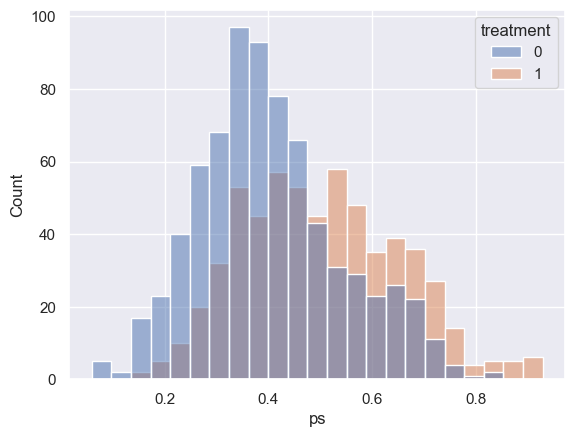

In [17]:
# check the overlap of ps for control and treatment using histogram
# if not much overlap, the matching won't work
sns.histplot(data=df, x='ps', hue='treatment')  # multiple="dodge" for 

<Axes: xlabel='ps1', ylabel='Count'>

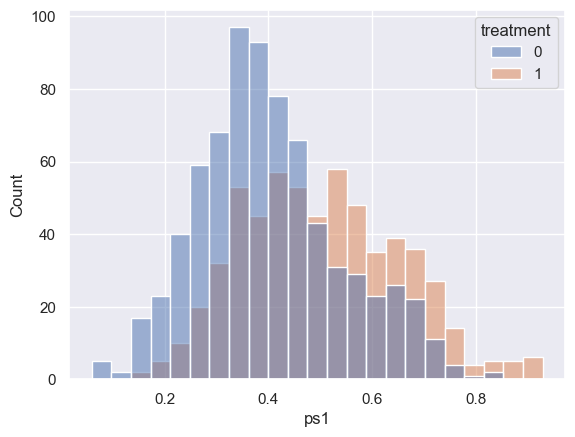

In [18]:
# adding 'min_req' here makes matching not working - because treatment is derived from min_req
# there is no overlap and thus matching will not work
X1 = df[pre_features]
y = df['treatment']

# use logistic regression to calculate the propensity scores
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X1, y)

pred_prob1 = lr1.predict_proba(X1)  # probabilities for classes
df['ps1'] = pred_prob1[:, 1]

sns.histplot(data=df, x='ps1', hue='treatment')

In [19]:
# use 75% of standard deviation of the propensity score as the caliper/radius
# get the k closest neighbors for each observations
# relax caliper and increase k can provide more matches

from sklearn.neighbors import NearestNeighbors

caliper = np.std(df.ps) * .75
print(f'caliper (radius) is: {caliper:.4f}')

n_neighbors = 50

# setup knn
knn = NearestNeighbors(n_neighbors=n_neighbors, radius=caliper)

ps = df[['ps']]  # double brackets as a dataframe
knn.fit(ps)

caliper (radius) is: 0.1147


,n_neighbors,50
,radius,0.11474049615475236
,algorithm,'auto'
,leaf_size,30
,metric,'minkowski'
,p,2
,metric_params,None
,n_jobs,None


In [20]:
# distances and indexes
distances, neighbor_indexes = knn.kneighbors(ps)

print(neighbor_indexes.shape)

# the 10 closest points to the first point
print(distances[0])
print(neighbor_indexes[0])

(1339, 50)
[0.         0.0004493  0.00453741 0.00731743 0.0091998  0.01427513
 0.01565903 0.02667932 0.03099889 0.03158723 0.03174239 0.03205824
 0.03578311 0.03662942 0.049912   0.05122632 0.0555278  0.0555278
 0.05647349 0.05912079 0.05965566 0.06540284 0.06561678 0.06789538
 0.06963631 0.07029882 0.07053792 0.07081046 0.07161579 0.07545926
 0.07545926 0.07664859 0.08010416 0.08197532 0.08318322 0.08345427
 0.08356696 0.08521143 0.08688286 0.0898609  0.09351441 0.09418864
 0.09641962 0.09782665 0.09926756 0.09944851 0.10037957 0.10090012
 0.10225264 0.10302784]
[   0 1092  664    5 1081    3   17   12  409    9   13    1   19  584
  134 1067   20   25    4  161  915  103   10 1235  309   35   11  438
 1215 1219 1236   24  123  391   15    8  325  576 1204   16  707 1084
  132   23 1210  433  451  307  126  712]


In [21]:
# for each point in treatment, we find a matching point in control without replacement
# note the 10 neighbors may include both points in treatment and control

# matched_control = []  # keep track of the matched observations in control

# for current_index, row in df.iterrows():  # iterate over the dataframe
#     if row.treatment == 0:  # the current row is in the control group
#         df.loc[current_index, 'matched'] = np.nan  # set matched to nan
#     else: 
#         for idx in neighbor_indexes[current_index, :]: # for each row in treatment, find the k neighbors
#             # make sure the current row is not the idx - don't match to itself
#             # and the neighbor is in the control 
#             if (current_index != idx) and (df.loc[idx].treatment == 0):
#                 if idx not in matched_control:  # this control has not been matched yet
#                     df.loc[current_index, 'matched'] = idx  # record the matching
#                     matched_control.append(idx)  # add the matched to the list
#                     break

# # Allow matching with replacement (controls can be matched multiple times)
# matched_control = []  # Now can contain duplicates
# df['matched'] = np.nan

# for current_index, row in df[df['treatment']==1].iterrows():  # Only loop through treatment cases
#     # Get distances and indexes of neighbors
#     distances, indexes = knn.kneighbors([df.loc[current_index, ['ps']]])
    
#     # Find the closest control unit (even if already matched)
#     for idx in indexes[0]:
#         if (idx != current_index) and (df.loc[idx, 'treatment'] == 0):
#             df.loc[current_index, 'matched'] = idx
#             matched_control.append(idx)
#             break  # Take just the first match

# Create treatment and control groups
df_treatment = df[df['treatment'] == 1].copy()
df_control = df[df['treatment'] == 0].copy()

# Fit NearestNeighbors on control group only
knn = NearestNeighbors(n_neighbors=1, radius=caliper)
knn.fit(df_control[['ps']])

# Match each treatment unit to a control unit (with replacement)
matched_treatment_indexes = []
matched_control_indexes = []

for idx, row in df_treatment.iterrows():
    ps_value = row['ps']
    distances, indices = knn.kneighbors([[ps_value]])

    if distances[0][0] <= caliper:  # ensure match is within caliper
        control_idx = df_control.index[indices[0][0]]
        matched_treatment_indexes.append(idx)
        matched_control_indexes.append(control_idx)

# Retrieve matched observations
matched_treatment = df.loc[matched_treatment_indexes].copy()
matched_control = df.loc[matched_control_indexes].copy()

# Combine matched pairs into one DataFrame
df_matched = pd.concat([matched_treatment, matched_control])

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749

In [22]:
# try to increase the number of neighbors and/or caliper to get more matches
print('total observations in treatment:', len(df[df.treatment==1]))
print('total matched observations in control:', len(matched_control))

# # control have no match
# treatment_matched = df.dropna(subset=['matched'])  # drop not matched

# # matched control observation indexes
# control_matched_idx = treatment_matched.matched
# control_matched_idx = control_matched_idx.astype(int)  # change to int
# control_matched = df.loc[control_matched_idx, :]  # select matched control observations

# # combine the matched treatment and control
# df_matched = pd.concat([treatment_matched, control_matched])

# df_matched.treatment.value_counts()

total observations in treatment: 599
total matched observations in control: 599


In [23]:
# matched control and treatment
df_matched_control = df_matched[df_matched.treatment==0]
df_matched_treatment = df_matched[df_matched.treatment==1]

In [24]:
# t-test for income (dependent variable) after matching
# p-value is not significant now
from scipy.stats import ttest_ind

# Print the mean income for matched control and treatment groups
print(df_matched_control['C5:TOT_INCOME/B'].mean(), df_matched_treatment['C5:TOT_INCOME/B'].mean())

# Compare samples
_, p = ttest_ind(df_matched_control['C5:TOT_INCOME/B'], df_matched_treatment['C5:TOT_INCOME/B'])
print(f'p={p:.3f}')

# Interpret the result
alpha = 0.05  # significance level
if p > alpha:
    print('Same distributions / same group mean (fail to reject H0 - we do not have enough evidence to reject H0)')
else:
    print('Different distributions / different group mean (reject H0 - treatment likely had an effect)')

2.297161936560935 2.4824707846410683
p=0.000
Different distributions / different group mean (reject H0 - treatment likely had an effect)


In [25]:
# As an effect size, Cohen's d is typically used to represent the magnitude of differences between two (or more) groups on a given variable, with larger values representing a greater differentiation between the two groups on that variable.
# we hope the effect sizes for features decrease after matching
# adapted from https://machinelearningmastery.com/effect-size-measures-in-python/

from numpy import mean
from numpy import var
from math import sqrt
 
# function to calculate Cohen's d for independent samples
def cohen_d(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

In [26]:
effect_sizes = []
cols = pre_features

for cl in cols:
    _, p_before = ttest_ind(df_control[cl], df_treatment[cl])
    _, p_after = ttest_ind(df_matched_control[cl], df_matched_treatment[cl])
    cohen_d_before = cohen_d(df_treatment[cl], df_control[cl])
    cohen_d_after = cohen_d(df_matched_treatment[cl], df_matched_control[cl])
    effect_sizes.append([cl,'before', cohen_d_before, p_before])
    effect_sizes.append([cl,'after', cohen_d_after, p_after])

In [27]:
df_effect_sizes = pd.DataFrame(effect_sizes, columns=['feature', 'matching', 'effect_size', 'p-value'])
df_effect_sizes

,feature,matching,effect_size,p-value
0,D1.1:A_BIKE,before,-0.188296,0.000631
1,D1.1:A_BIKE,after,0.013500,0.815305
2,D1.1-A_QTY,before,-0.190544,0.000543
3,D1.1-A_QTY,after,0.013500,0.815305
4,D1.2:A_MOTORC,before,-0.189719,0.000574
...,...,...,...,...
109,G4:A_PN-IN,after,0.022092,0.702282
110,G5:A_LIFE-IN,before,0.041054,0.455221
111,G5:A_LIFE-IN,after,0.022765,0.693669
112,G6:A_HEALTH-IN,before,-0.009189,0.867241


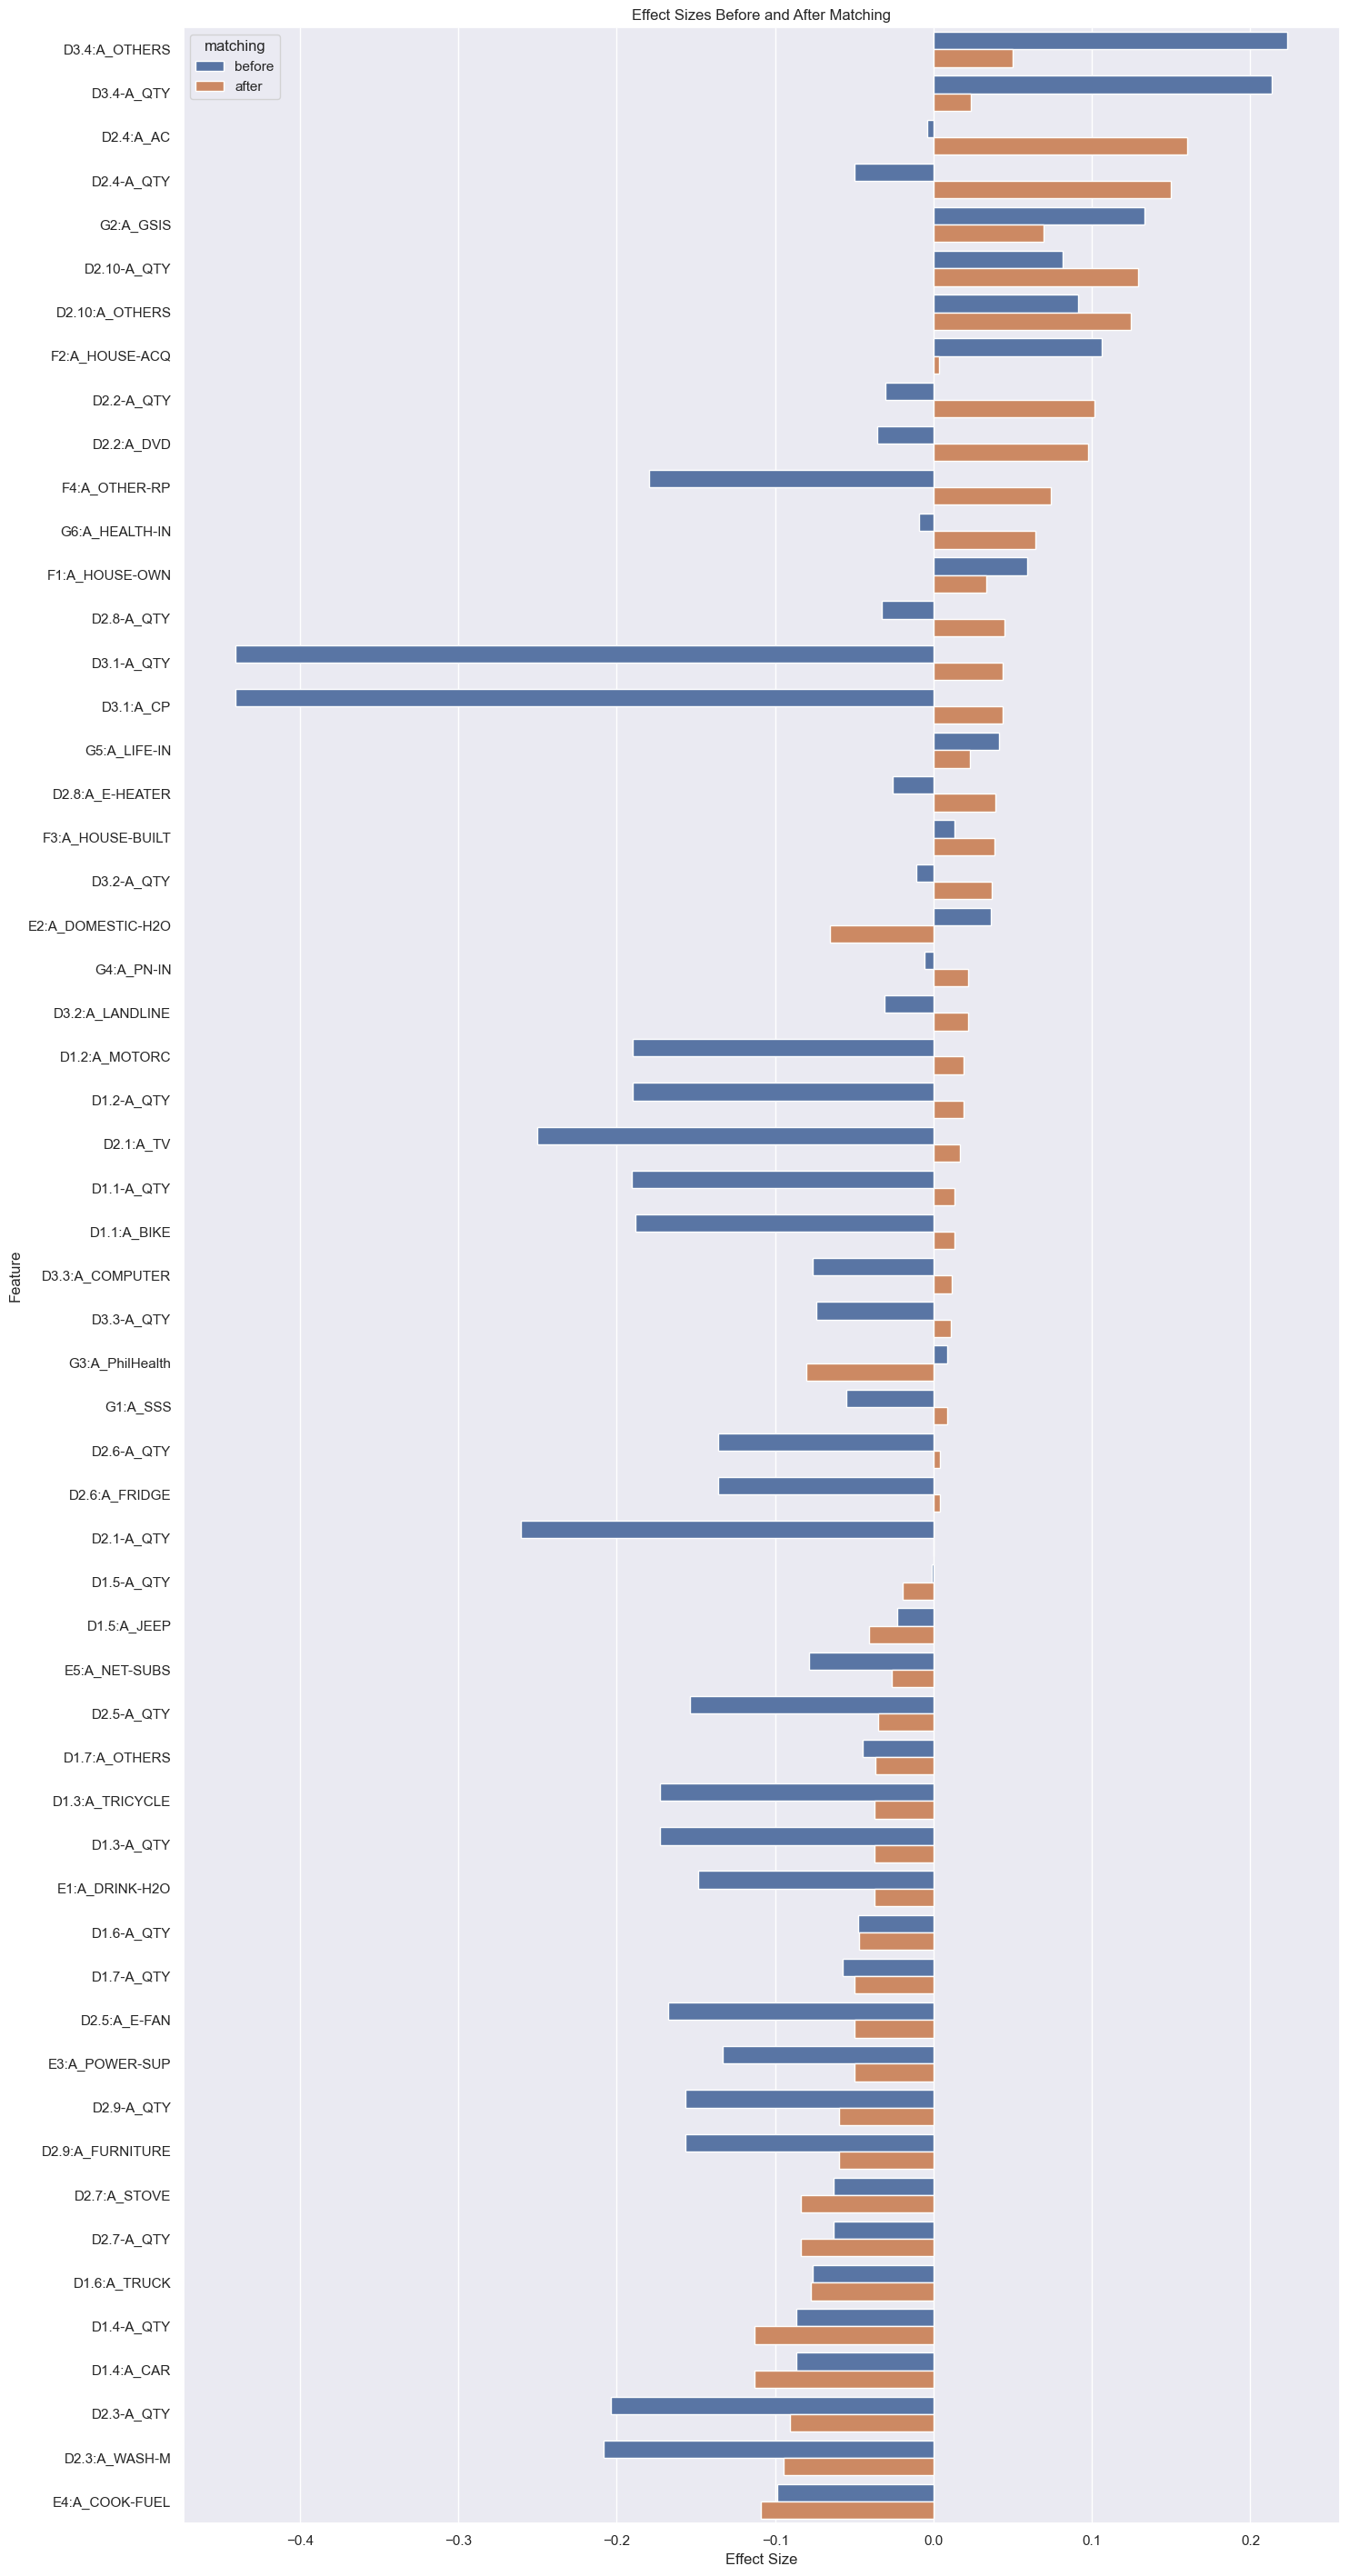

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort features for better visualization
df_effect_sizes_sorted = df_effect_sizes.sort_values(by='effect_size', ascending=False)

# Set plot size dynamically based on number of features
num_features = df_effect_sizes_sorted.shape[0]
fig_height = max(10, num_features * 0.25)  # adjust this scale if needed

# Create the barplot
fig, ax = plt.subplots(figsize=(15, fig_height))
sns.barplot(
    data=df_effect_sizes_sorted,
    x='effect_size',
    y='feature',
    hue='matching',
    orient='h'
)

# Improve layout
plt.title("Effect Sizes Before and After Matching")
plt.xlabel("Effect Size")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [29]:
predicted_data = df[['ps', 'ps_logit', 'treatment']]
print(predicted_data.head())

         ps  ps_logit  treatment
0  0.831166  1.593912          1
1  0.799108  1.380726          1
2  0.570138  0.282415          1
3  0.845441  1.699282          1
4  0.887639  2.066851          1


In [30]:
# Add a column to identify matched pairs
matched_treatment = matched_treatment.copy()
matched_control = matched_control.copy()

matched_treatment['pair_id'] = range(len(matched_treatment))
matched_control['pair_id'] = range(len(matched_control))

# Combine again with pair IDs
df_matched = pd.concat([matched_treatment, matched_control])

# View some of the matched pairs
matched_data = df_matched[['pair_id', 'ps', 'treatment']]
print(matched_data.sort_values('pair_id').head(10))

      pair_id        ps  treatment
0           0  0.831166          1
1092        0  0.831615          0
1067        1  0.779940          0
1           1  0.799108          1
2           2  0.570138          1
156         2  0.570239          0
3           3  0.845441          1
1092        3  0.831615          0
4           4  0.887639          1
1092        4  0.831615          0


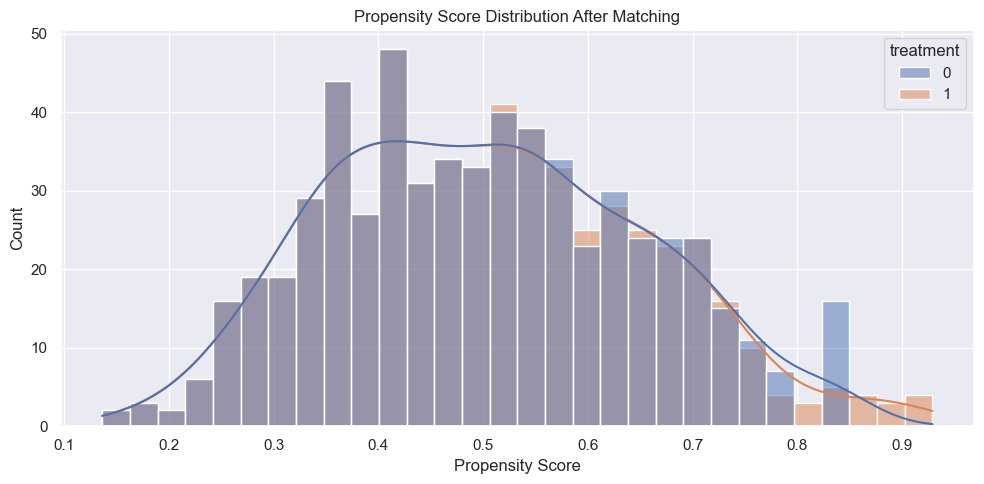

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_matched, x='ps', hue='treatment', kde=True, bins=30)
plt.title("Propensity Score Distribution After Matching")
plt.xlabel("Propensity Score")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

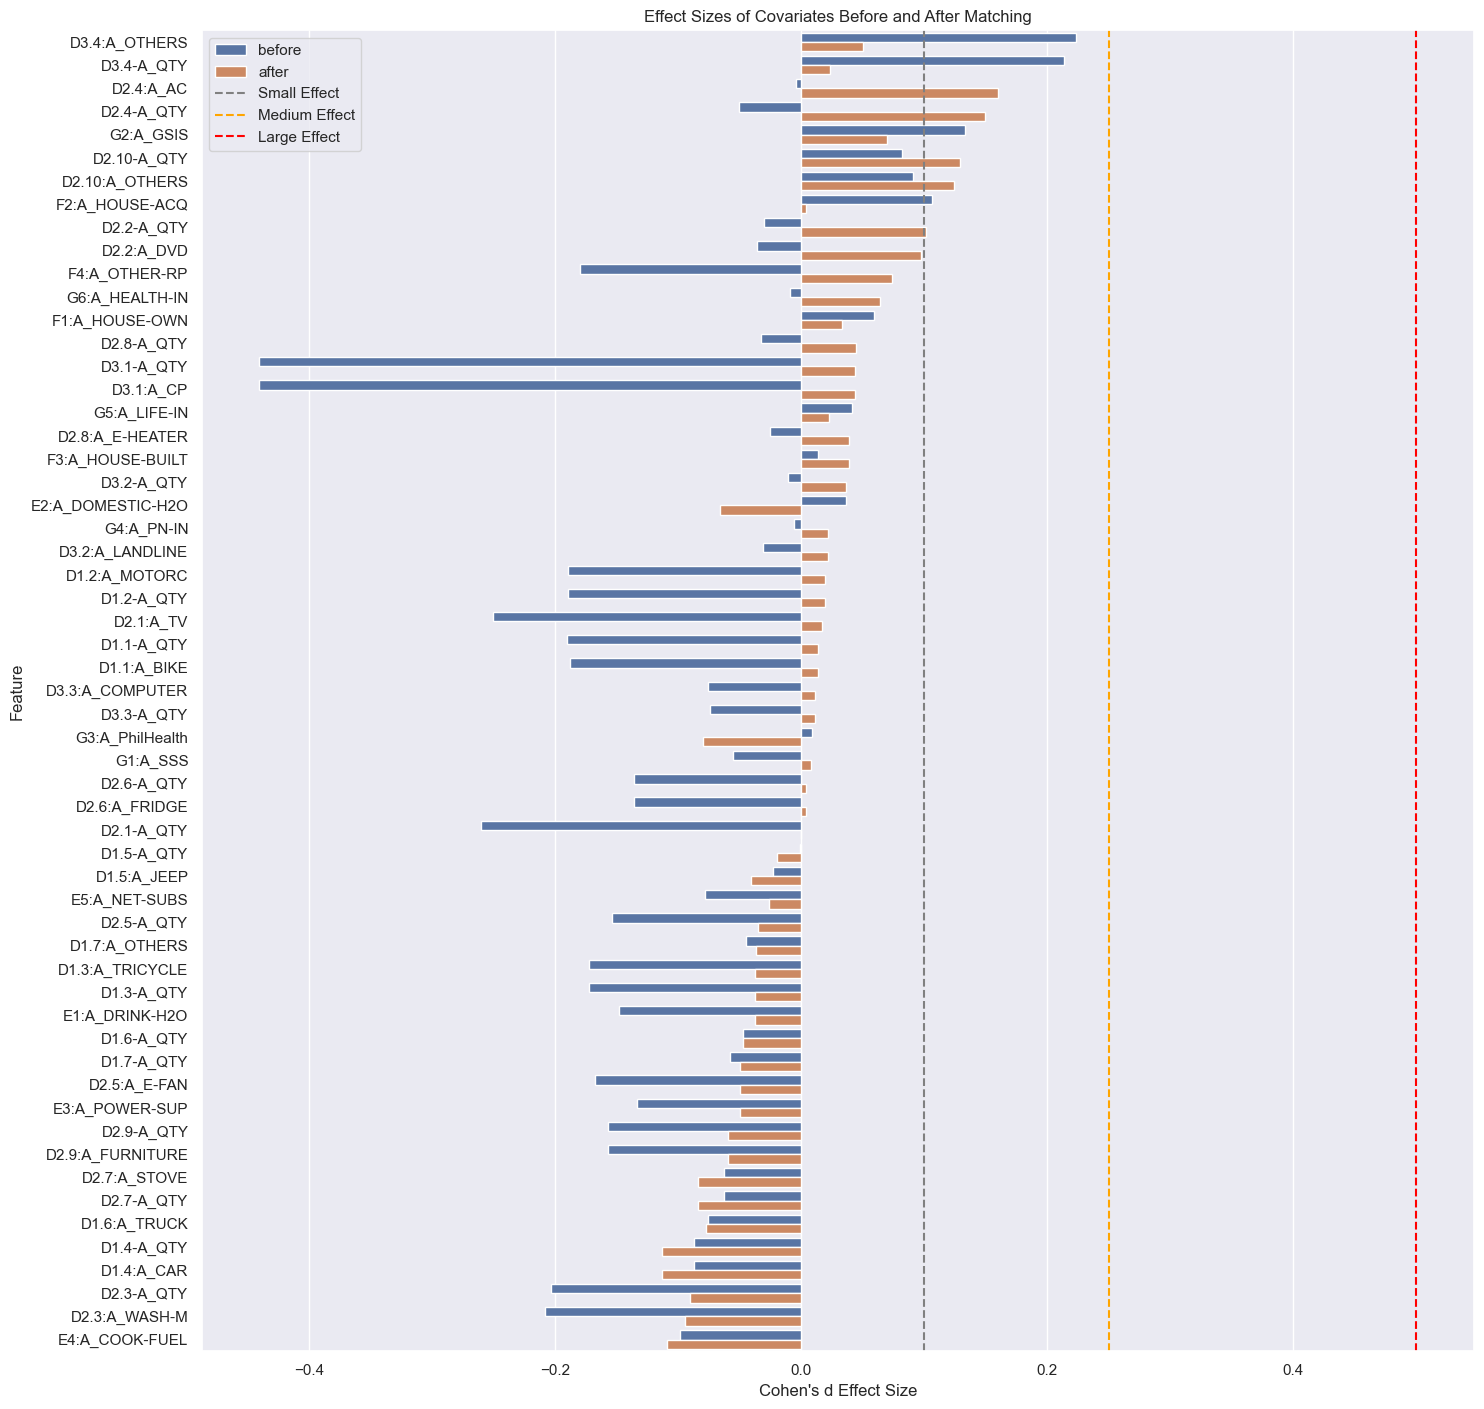

In [32]:
df_effect_sizes_sorted = df_effect_sizes.sort_values(by='effect_size', ascending=False)

plt.figure(figsize=(15, max(10, len(df_effect_sizes_sorted['feature'].unique()) * 0.25)))
sns.barplot(
    data=df_effect_sizes_sorted,
    x='effect_size',
    y='feature',
    hue='matching',
    orient='h'
)
plt.title("Effect Sizes of Covariates Before and After Matching")
plt.axvline(0.1, color='gray', linestyle='--', label='Small Effect')
plt.axvline(0.25, color='orange', linestyle='--', label='Medium Effect')
plt.axvline(0.5, color='red', linestyle='--', label='Large Effect')
plt.xlabel("Cohen's d Effect Size")
plt.ylabel("Feature")
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
pd.set_option('display.max_rows', None)
print(df_effect_sizes[['feature', 'matching', 'effect_size']].to_string(index=False))

          feature matching  effect_size
      D1.1:A_BIKE   before    -0.188296
      D1.1:A_BIKE    after     0.013500
       D1.1-A_QTY   before    -0.190544
       D1.1-A_QTY    after     0.013500
    D1.2:A_MOTORC   before    -0.189719
    D1.2:A_MOTORC    after     0.019146
       D1.2-A_QTY   before    -0.189719
       D1.2-A_QTY    after     0.019146
  D1.3:A_TRICYCLE   before    -0.172629
  D1.3:A_TRICYCLE    after    -0.037372
       D1.3-A_QTY   before    -0.172629
       D1.3-A_QTY    after    -0.037372
       D1.4:A_CAR   before    -0.086756
       D1.4:A_CAR    after    -0.112882
       D1.4-A_QTY   before    -0.086756
       D1.4-A_QTY    after    -0.112882
      D1.5:A_JEEP   before    -0.022672
      D1.5:A_JEEP    after    -0.040970
       D1.5-A_QTY   before    -0.000966
       D1.5-A_QTY    after    -0.019319
     D1.6:A_TRUCK   before    -0.076167
     D1.6:A_TRUCK    after    -0.077680
       D1.6-A_QTY   before    -0.047373
       D1.6-A_QTY    after    -0.047272


PSM Evaluation Results:
Overall Passed: True

Effect Size Summary (After Matching):
count    57.000000
mean      0.000281
std       0.065959
min      -0.112882
25%      -0.049710
50%       0.008361
75%       0.038746
max       0.160140
Name: effect_size, dtype: float64

P-Value Summary (After Matching):
count    57.000000
mean      0.452518
std       0.292762
min       0.005668
25%       0.179093
50%       0.449288
75%       0.702282
max       1.000000
Name: p-value, dtype: float64

Propensity Score Overlap Status:
Max Quantile Difference: 0.00

Sample Size Retention:
Retention Rate: 100.0%


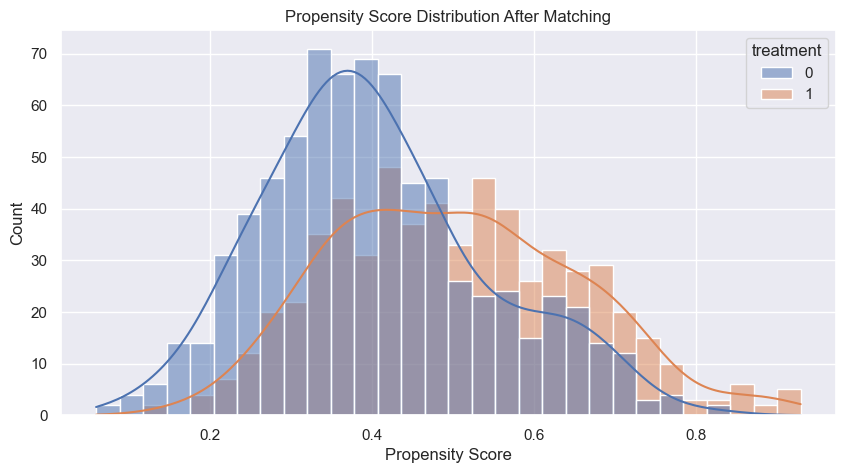

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

def check_psm_success(df_effect_sizes, df_matched, df, treatment_col='treatment', ps_col='ps', effect_size_threshold=0.1, p_value_threshold=0.05):
    results = {
        'passed': True,
        'reasons': [],
        'failed_covariates': [],
        'effect_size_summary': None,
        'p_value_summary': None,
        'overlap_status': None,
        'sample_size_status': None
    }
    
    # 1. Check covariate balance (effect sizes and p-values after matching)
    after_matching = df_effect_sizes[df_effect_sizes['matching'] == 'after']
    
    # Count covariates with effect size > threshold or p-value < threshold
    large_effect_size = after_matching[abs(after_matching['effect_size']) > effect_size_threshold]
    significant_p_value = after_matching[after_matching['p-value'] < p_value_threshold]
    
    # Failure if more than 20% of covariates are unbalanced
    unbalanced_covariates = set(large_effect_size['feature']).union(set(significant_p_value['feature']))
    unbalanced_percentage = len(unbalanced_covariates) / len(after_matching) * 100
    
    if unbalanced_percentage > 20:
        results['passed'] = False
        results['reasons'].append(f"High percentage of unbalanced covariates ({unbalanced_percentage:.1f}%).")
        results['failed_covariates'] = list(unbalanced_covariates)
    
    # Store summaries
    results['effect_size_summary'] = after_matching['effect_size'].describe()
    results['p_value_summary'] = after_matching['p-value'].describe()
    
    # 2. Check propensity score overlap
    treatment_ps = df_matched[df_matched[treatment_col] == 1][ps_col]
    control_ps = df_matched[df_matched[treatment_col] == 0][ps_col]
    
    # Compare quantiles to check overlap
    treatment_quantiles = treatment_ps.quantile([0.1, 0.5, 0.9])
    control_quantiles = control_ps.quantile([0.1, 0.5, 0.9])
    
    # Check if quantiles are within a reasonable range (e.g., 0.1 difference)
    quantile_diff = (treatment_quantiles - control_quantiles).abs().max()
    if quantile_diff > 0.2:
        results['passed'] = False
        results['reasons'].append(f"Propensity score distributions do not overlap well (max quantile difference: {quantile_diff:.2f}).")
    
    results['overlap_status'] = {
        'treatment_quantiles': treatment_quantiles,
        'control_quantiles': control_quantiles,
        'max_quantile_diff': quantile_diff
    }
    
    # 3. Check sample size retention
    original_treatment_size = len(df[df[treatment_col] == 1])
    matched_treatment_size = len(df_matched[df_matched[treatment_col] == 1])
    retention_rate = matched_treatment_size / original_treatment_size * 100
    
    if retention_rate < 80:
        results['passed'] = False
        results['reasons'].append(f"Low sample retention rate ({retention_rate:.1f}%).")
    
    results['sample_size_status'] = {
        'original_treatment_size': original_treatment_size,
        'matched_treatment_size': matched_treatment_size,
        'retention_rate': retention_rate
    }
    
    return results

# Example usage:
results = check_psm_success(df_effect_sizes, df_matched, df)
print("PSM Evaluation Results:")
print(f"Overall Passed: {results['passed']}")
if not results['passed']:
    print("Reasons for Failure:")
    for reason in results['reasons']:
        print(f"- {reason}")
    if results['failed_covariates']:
        print(f"Unbalanced Covariates: {results['failed_covariates']}")

print("\nEffect Size Summary (After Matching):")
print(results['effect_size_summary'])
print("\nP-Value Summary (After Matching):")
print(results['p_value_summary'])
print("\nPropensity Score Overlap Status:")
print(f"Max Quantile Difference: {results['overlap_status']['max_quantile_diff']:.2f}")
print("\nSample Size Retention:")
print(f"Retention Rate: {results['sample_size_status']['retention_rate']:.1f}%")

# Plot propensity score distributions after matching
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='ps', hue='treatment', kde=True, bins=30)
plt.title("Propensity Score Distribution After Matching")
plt.xlabel("Propensity Score")
plt.ylabel("Count")
plt.show()